In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('NAS.csv')
df['Date'] = pd.to_datetime(df['Date'])

In [3]:
df = df.dropna()
df.head(25)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
7,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0
8,2003-12-30,17.425800,17.882900,17.425800,17.711500,17.711500,67298.0
11,2004-01-02,17.940001,18.054300,17.768600,17.768600,17.768600,322923.0
12,2004-01-05,18.054300,18.054300,17.711500,17.711500,17.711500,182782.0
13,2004-01-06,17.940001,17.997101,17.597200,17.597200,17.597200,300054.0
14,2004-01-07,17.425800,17.711500,17.140100,17.140100,17.140100,189937.0


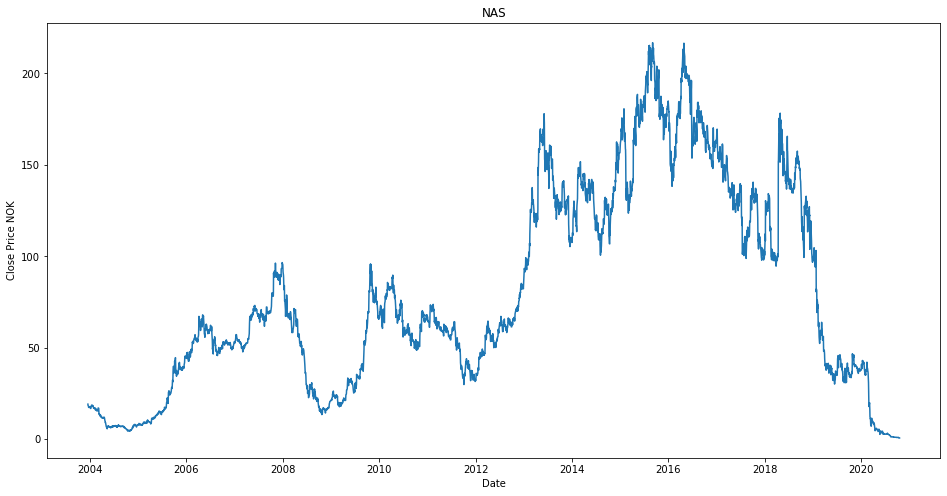

In [4]:
plt.figure(figsize=(16,8))
plt.title('NAS')
plt.xlabel('Date')
plt.ylabel('Close Price NOK')
plt.plot(df['Date'],df['Close'])
#plt.plot(df['Close'])
plt.show()

In [5]:
#Removing all columns and focusing on the close price
#Here we are using copy because we are making a full new copy
df = df[['Date','Close']].copy()

In [6]:
#Here we are creating a variable for the amount of days into the future
future_days = 25
#Here we are creating a new column for the target predictions shifted 'x' days up 
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(50)

,Date,Close,Prediction
4202,2020-08-07,1.5770,1.3470
4203,2020-08-10,1.3470,1.3995
4204,2020-08-11,1.3995,1.4400
4205,2020-08-12,1.4400,1.3200
4206,2020-08-13,1.3200,1.2510
4207,2020-08-14,1.2510,1.3675
4208,2020-08-17,1.3675,1.3000
4209,2020-08-18,1.3000,1.2920
4210,2020-08-19,1.2920,1.2990
4211,2020-08-20,1.2990,1.2630


In [7]:
#Here we are creating the feature data set (X) and converting it into a numpy array where we ignore the last 'x' days
X = np.array(df.drop(['Prediction','Date'], 1))[:-future_days] #This method makes the closing values in a column
print(X)

[[19.139799]
 [18.454201]
 [18.0543  ]
 ...
 [ 0.6006  ]
 [ 0.626   ]
 [ 0.605   ]]


In [8]:
#Here we are creating the target data set (y) and converting it into a numpy array where we ignore the last 'x' days
y = np.array(df['Prediction'])[:-future_days]
print(y)

[18.454201 18.0543   17.4258   ...  0.626     0.605     0.6106  ]


In [9]:
#Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [10]:
#Create the models
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [11]:
df.tail(50)

,Date,Close,Prediction
4202,2020-08-07,1.5770,1.3470
4203,2020-08-10,1.3470,1.3995
4204,2020-08-11,1.3995,1.4400
4205,2020-08-12,1.4400,1.3200
4206,2020-08-13,1.3200,1.2510
4207,2020-08-14,1.2510,1.3675
4208,2020-08-17,1.3675,1.3000
4209,2020-08-18,1.3000,1.2920
4210,2020-08-19,1.2920,1.2990
4211,2020-08-20,1.2990,1.2630


In [12]:
#Get the last 'x' rows/days from the feature data set
x_future = df.drop(['Prediction','Date'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[0.605]])

In [13]:
#Creating variable for the future set
#x_future = df.drop(['Prediction','Date'], 1)
#x_future = x_future.tail(25+future_days)
#x_future = np.array(x_future)
#x_future

In [14]:
#Input date is put into the prediction
#inputdato = '2004-01-02'
#df.loc[df['Date'] == inputdato]
#inputdato = df.loc[df['Date'] == inputdato]
#inputdato = inputdato.drop(['Prediction', 'Date'], 1)
#inputdato = np.array(inputdato)

In [15]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[0.6106]


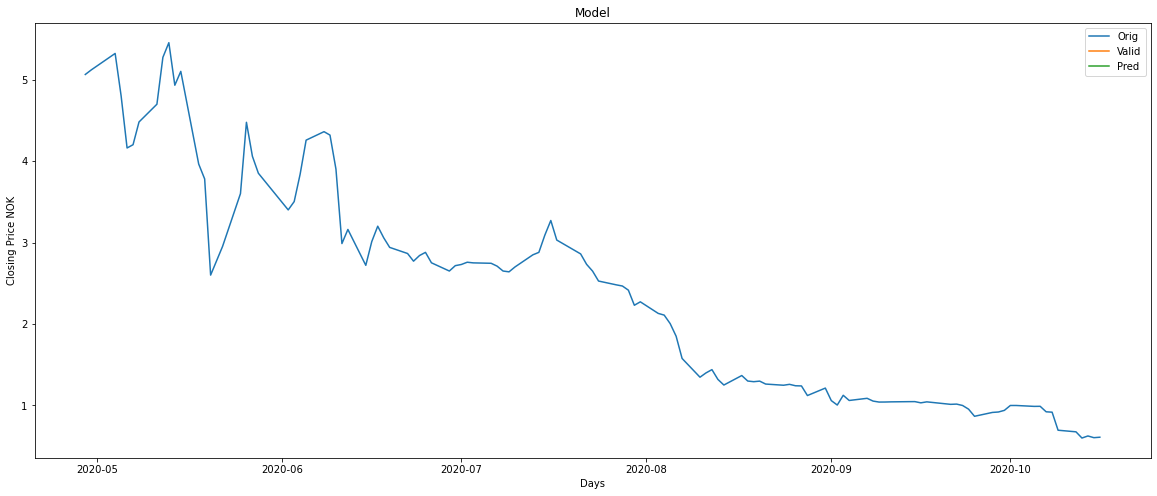

In [16]:
#Here we are going to visualize the prediction
predictions = tree_prediction

#Here we are appending 25 days into the future in the dataset
#df = df.append(pd.DataFrame({'Date': pd.date_range(start=df.Date.iloc[-1], periods=26,freq='D',closed='right')}))
#df = df.reset_index(drop=True)

valid = df[X.shape[0]:].copy()
valid['Predictions'] = predictions
plt.figure(figsize=(20,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Closing Price NOK')
#plt.scatter(valid['Date'],valid['Predictions'], color = 'red')
plt.plot(df['Date'][4100:],df['Close'][4100:])
plt.plot(valid['Date'],valid[['Close','Predictions']])
plt.legend(['Orig','Valid','Pred'])
plt.show()

#As you can see the yellow line shows the actual price and the green shows the prediction
#From this we can see that the prediction is accurate when price is calm
#But at some points where the price goes up or down the algorithm isn't perfect
#The reason why the model isn't very accurate is because the price over the whole time it has existed has fluctuated alot
#especially in the last year because of the coronavirus

In [17]:
#df['Prediction'].tail(25) = valid['Predictions']

#nydf = nydf.append(pd.DataFrame({'Date': pd.date_range(start=df.Date.iloc[-1], periods=26,freq='D',closed='right')}))
#nydf = nydf.reset_index(drop=True)

#Here we are creating a variable for the amount of days into the future
#future_days = 25
#Here we are creating a new column for the target predictions shifted 'x' days up 
#nydf['Prediction'] = nydf[['Close']].shift(-future_days)
#df.tail(50)

#x1_future = nydf.drop(['Prediction','Date'], 1)
#x1_future = x_future.tail(25+future_days)
#x1_future = np.array(x_future)
#x1_future

In [18]:
#Testing input date
inputdato = '2004-01-02'
df.loc[df['Date'] == inputdato]
inputdf = df.loc[df['Date'] == inputdato]
inputdf= inputdf.drop(['Prediction', 'Date'], 1)
inputdf = np.array(inputdf)
inputdf

array([[17.7686]])

In [19]:
inputprediction = tree.predict(inputdf)
inputprediction

array([18.0828505])

In [20]:
newdf = df[:11]

In [21]:
newdf.head(50)

,Date,Close,Prediction
0,2003-12-18,19.139799,18.454201
1,2003-12-19,18.454201,18.054300
2,2003-12-22,18.054300,17.425800
3,2003-12-23,17.425800,17.254400
7,2003-12-29,17.254400,17.711500
8,2003-12-30,17.711500,17.768600
11,2004-01-02,17.768600,17.711500
12,2004-01-05,17.711500,17.597200
13,2004-01-06,17.597200,17.140100
14,2004-01-07,17.140100,16.740200


In [22]:
df.loc[df['Date'] == '2017-05-10']

,Date,Close,Prediction
3391,2017-05-10,139.063004,132.550003


In [23]:
inputdf = df.loc[df['Date'] == '2017-05-10']
inputdf= inputdf.drop(['Prediction', 'Date'], 1)
inputdf = np.array(inputdf)
inputdf

array([[139.063004]])

In [24]:
inputprediction = tree.predict(inputdf)
inputprediction

array([132.550003])